In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement 

##### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

# 2.Data Gathering

In [2]:
sales_df = pd.read_csv('advertising.csv')
sales_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# 3.EDA

In [4]:
sales_df_copy = sales_df

In [5]:
sales_df_copy.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
sales_df.shape

(200, 4)

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### checking the null values

In [9]:
sales_df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 1.TV

In [10]:
sales_df['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [11]:
sales_df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [12]:
sales_df['TV'].nunique()

190

In [13]:
sales_df['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

<Axes: ylabel='TV'>

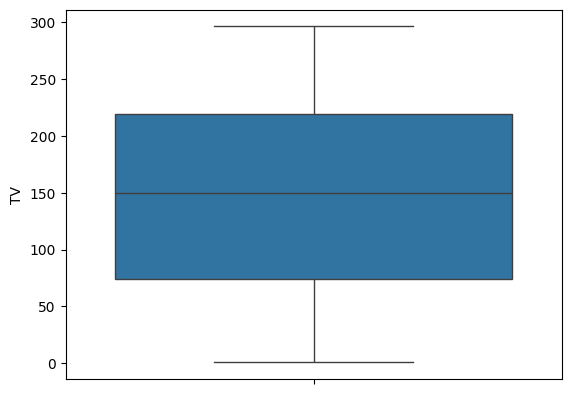

In [14]:
sns.boxplot(sales_df['TV'])

<Axes: xlabel='TV', ylabel='Density'>

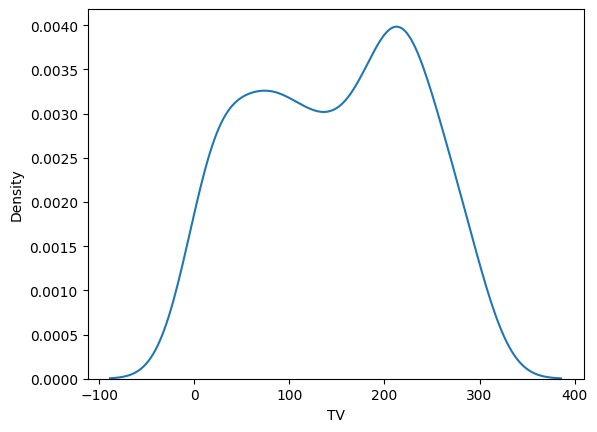

In [15]:
sns.kdeplot(sales_df['TV'])

In [16]:
sales_df['TV'].skew()

-0.06985336213274573

<Axes: xlabel='TV', ylabel='Density'>

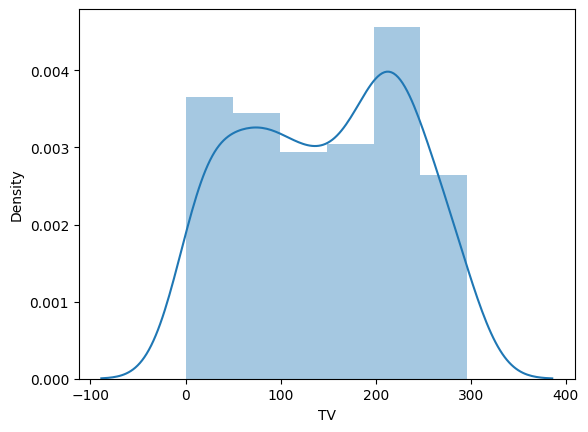

In [17]:
sns.distplot(sales_df['TV'])

<Axes: xlabel='TV', ylabel='Sales'>

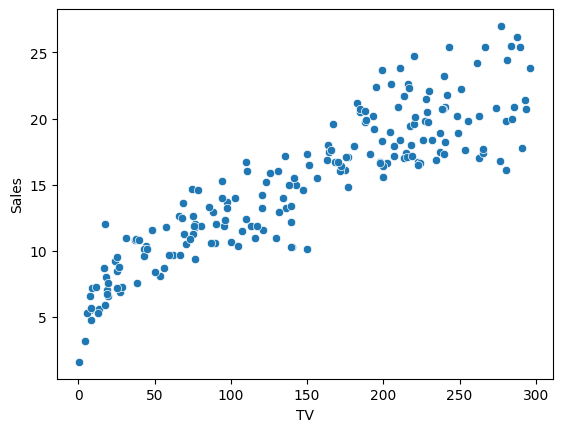

In [18]:
sns.scatterplot(x = sales_df['TV'],y = sales_df['Sales'])

## 2.Radio

In [19]:
sales_df['Radio']

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [20]:
sales_df['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [21]:
sales_df['Radio'].nunique()

167

In [22]:
sales_df['Radio'].value_counts()

Radio
4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: count, Length: 167, dtype: int64

<Axes: ylabel='Radio'>

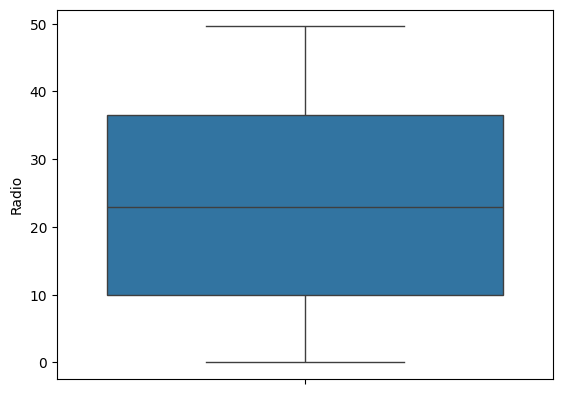

In [23]:
sns.boxplot(sales_df['Radio'])

<Axes: ylabel='Radio'>

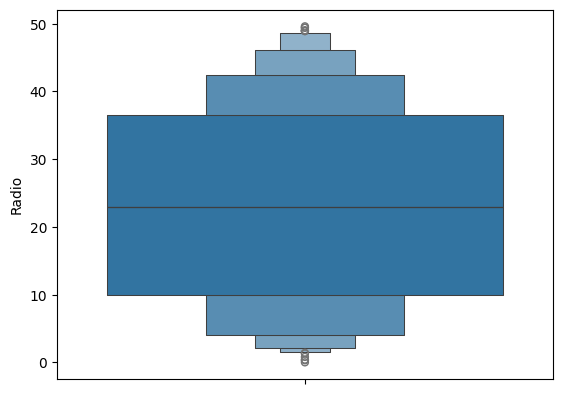

In [24]:
sns.boxenplot(sales_df['Radio'])

<Axes: xlabel='Radio', ylabel='Density'>

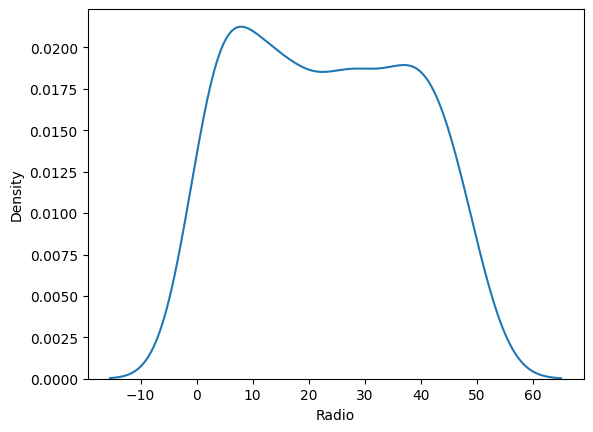

In [25]:
sns.kdeplot(sales_df['Radio'])

<Axes: xlabel='Radio', ylabel='Sales'>

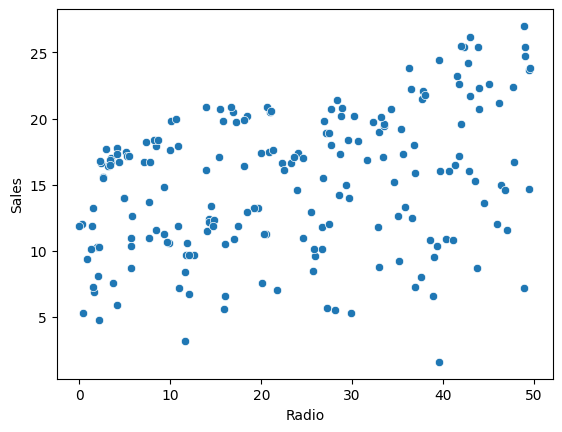

In [26]:
sns.scatterplot(x = sales_df['Radio'],y = sales_df['Sales'])

## 3.Newspaper

In [27]:
sales_df['Newspaper']

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

In [28]:
sales_df['Newspaper'].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [29]:
sales_df['Newspaper'].nunique()

172

In [30]:
sales_df['Newspaper'].value_counts()

Newspaper
9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: count, Length: 172, dtype: int64

<Axes: ylabel='Newspaper'>

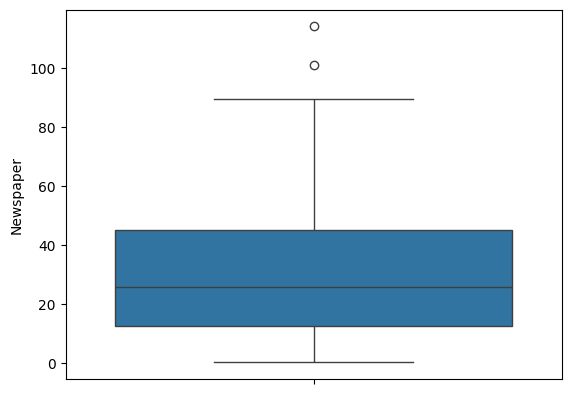

In [31]:
sns.boxplot(sales_df['Newspaper'])

In [32]:
sales_df['Newspaper'].max()

114.0

In [33]:
sales_df['Newspaper'].min()

0.3

In [34]:
sales_df['Newspaper'].skew()

0.8947204074986175

<Axes: xlabel='Newspaper', ylabel='Density'>

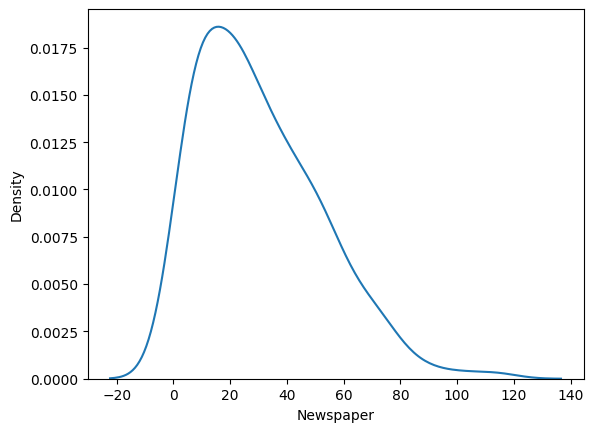

In [35]:
sns.kdeplot(sales_df['Newspaper'])

In [36]:
sales_df['Newspaper'] = np.where(sales_df['Newspaper'] > 100,sales_df['Newspaper'].mean(),sales_df['Newspaper'])

<Axes: ylabel='Newspaper'>

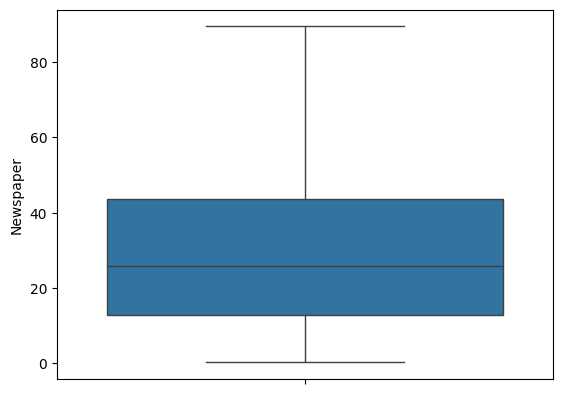

In [37]:
sns.boxplot(sales_df['Newspaper'])

<Axes: xlabel='Newspaper', ylabel='Density'>

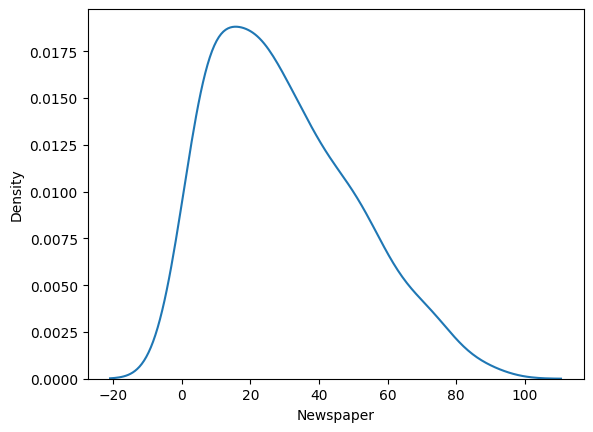

In [38]:
sns.kdeplot(sales_df['Newspaper'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

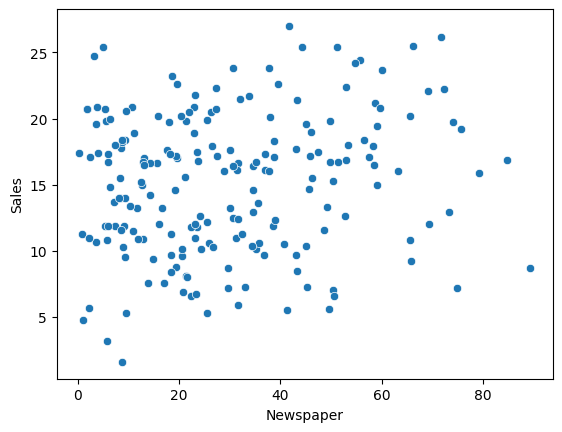

In [39]:
sns.scatterplot(x = sales_df['Newspaper'],y = sales_df['Sales'])

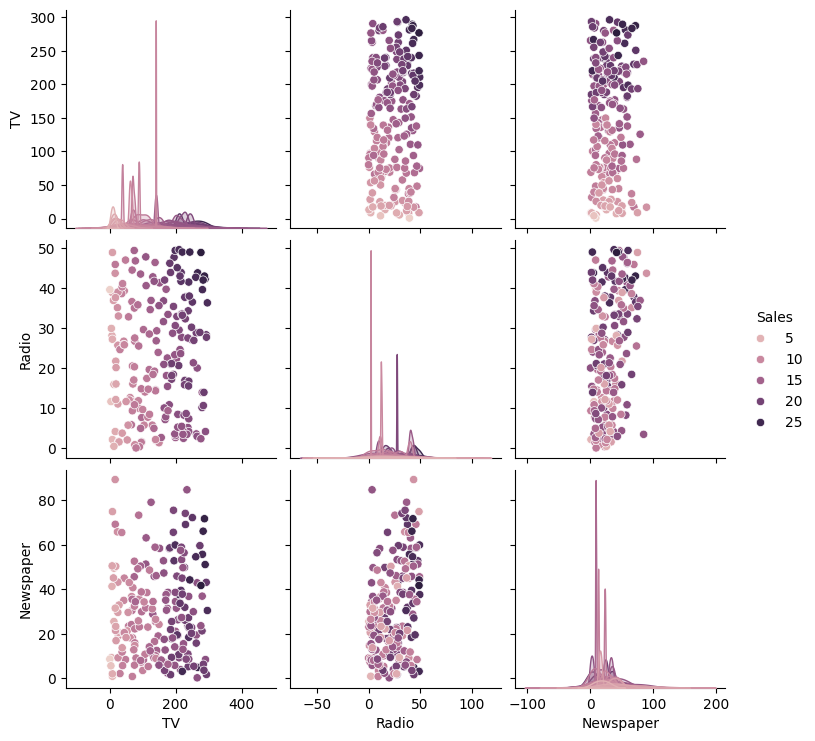

In [40]:
sns.pairplot(sales_df,hue = 'Sales')

# 4. Model Training

In [41]:
x = sales_df.drop('Sales',axis=1)
y = sales_df['Sales']

### splitting the data into train and test

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [43]:
x_train

,TV,Radio,Newspaper
137,273.7,28.9,59.7
163,163.5,36.8,7.4
111,241.7,38.0,23.2
123,123.1,34.6,12.4
109,255.4,26.9,5.5
...,...,...,...
43,206.9,8.4,26.4
22,13.2,15.9,49.6
72,26.8,33.0,19.3
15,195.4,47.7,52.9


In [44]:
y_train

137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
       ... 
43     17.9
22      5.6
72      8.8
15     22.4
168    17.1
Name: Sales, Length: 160, dtype: float64

In [45]:
x_test

,TV,Radio,Newspaper
112,175.7,15.4,2.4
29,70.6,16.0,40.8
182,56.2,5.7,29.7
199,232.1,8.6,8.7
193,166.8,42.0,3.6
85,193.2,18.4,65.7
10,66.1,5.8,24.2
54,262.7,28.8,15.9
115,75.1,35.0,52.7
35,290.7,4.1,8.5


In [46]:
y_test

112    17.1
29     10.5
182     8.7
199    18.4
193    19.6
85     20.2
10     12.6
54     20.2
115    12.6
35     17.8
12      9.2
92     19.4
13     13.7
126     6.6
174    16.5
2      12.0
44      8.5
3      16.5
113    20.9
14     19.0
23     20.5
25     17.0
6      11.8
134    10.8
165    16.9
173    16.7
45     16.1
65     11.3
48     19.8
122    16.6
178    16.8
64     16.0
9      15.6
57     13.2
78      5.3
71     12.4
128    24.7
176    20.2
131    17.7
53     21.2
Name: Sales, dtype: float64

#### Creating the instance of our model

In [47]:
Linear_reg = LinearRegression()
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [48]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    Mean_squared_error = mean_squared_error(act, pred)
    print('Mean Squared Error :', Mean_squared_error)
    print('***'*20)
    
    Mean_absolute_error = mean_absolute_error(act, pred)
    print('Mean Absolute Error : ', Mean_absolute_error)
    print('***'*20)
    
    R2_score = r2_score(act, pred)
    print('R_2 Score : ', R2_score)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(Linear_reg,x_test,y_test)

******************Testing Data Evaluation*******************
Mean Squared Error : 3.098702597421817
************************************************************
Mean Absolute Error :  1.4029656695020887
************************************************************
R_2 Score :  0.8403535024274204
************************************************************


In [49]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    Mean_squared_error = mean_squared_error(act, pred)
    print('Mean Squared Error :', Mean_squared_error)
    print('***'*20)
    
    Mean_absolute_error = mean_absolute_error(act, pred)
    print('Mean Absolute Error : ', Mean_absolute_error)
    print('***'*20)
    
    R2_score = r2_score(act, pred)
    print('R_2 Score : ', R2_score)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(Linear_reg,x_train,y_train)

******************Testing Data Evaluation*******************
Mean Squared Error : 2.620934612632738
************************************************************
Mean Absolute Error :  1.2021630787921858
************************************************************
R_2 Score :  0.9121265966137374
************************************************************


In [50]:
Linear_reg.predict([[5000,37000,6852]])

array([4097.96221491])